Prediksi Penyakit Jantung

In [ ]:
!python --version


Python 3.10.12


In [ ]:
# Library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import shapiro, kstest, norm, probplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score





In [ ]:
# Load dataset

df = pd.read_excel('heartdisease_data.xlsx')
df.head()


,no,tgl_pem,namaps,sex,tgl_lahir,merokok,alkohol,krg_sayurbuah,tb,bb,lp,sistole,diastole,rr,hr,dx1,dx2
0,1,2024-12-02 07:45:45,TIARA SRI ANNISA.H,Perempuan,1994-05-20,Tidak,Tidak,Tidak,154 cm,58 kg,78 cm,112 mm,79 Hg,20 /menit,80 /menit,Dyspepsia,NaN
1,2,2024-12-02 07:47:28,EVI YULIANTI,Perempuan,1997-09-21,Tidak,Tidak,Tidak,150 cm,42 kg,80 cm,100 mm,70 Hg,19 /menit,80 /menit,General examination and investigation of perso...,NaN
2,3,2024-12-02 07:49:24,NURDIANTO,Laki-laki,1997-09-11,Ya,Tidak,Tidak,162.5 cm,54 kg,90 cm,148 mm,100 Hg,18 /menit,80 /menit,Dyspepsia,NaN
3,4,2024-12-02 07:51:40,FEBRI MILLENIUS PARDEDE,Laki-laki,2000-02-17,Tidak,Tidak,Tidak,167 cm,48 kg,80 cm,111 mm,71 Hg,18 /menit,66 /menit,Dyspepsia,NaN
4,5,2024-12-02 07:59:57,PUTRI NADILA,Perempuan,2005-01-07,Tidak,Tidak,Tidak,150.5 cm,39 kg,80 cm,115 mm,90 Hg,18 /menit,102 /menit,Acute nasopharyngitis [common cold],NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14318 entries, 0 to 14317
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             14318 non-null  int64 
 1   tgl_pem        14318 non-null  object
 2   namaps         14318 non-null  object
 3   sex            14318 non-null  object
 4   tgl_lahir      14316 non-null  object
 5   merokok        14318 non-null  object
 6   alkohol        14318 non-null  object
 7   krg_sayurbuah  14318 non-null  object
 8   tb             14056 non-null  object
 9   bb             14056 non-null  object
 10  lp             12161 non-null  object
 11  sistole        13975 non-null  object
 12  diastole       13974 non-null  object
 13  rr             13974 non-null  object
 14  hr             13974 non-null  object
 15  dx1            14051 non-null  object
 16  dx2            2069 non-null   object
dtypes: int64(1), object(16)
memory usage: 1.9+ MB


In [ ]:
display(df.isna().sum())

,0
no,0
tgl_pem,0
namaps,0
sex,0
tgl_lahir,2
merokok,0
alkohol,0
krg_sayurbuah,0
tb,262
bb,262


In [ ]:
# Mengubah data string nemjadi numerik (menghilangkan satuan)

df['bb'] = df['bb'].str.replace(' kg', ' ', regex=False).astype(float)
df['tb'] = df['tb'].str.replace(' cm', ' ', regex=False).astype(float)
df['lp'] = df['lp'].str.replace(' cm', ' ', regex=False).astype(float)
df['sistole'] = df['sistole'].str.replace('mm', ' ',regex=False).astype(float).astype('Int64')
df['diastole'] = df['diastole'].str.replace('Hg', ' ', regex=False).astype(float).astype('Int64')
df['rr'] = df['rr'].str.replace('/menit', ' ', regex=False).astype(float).astype('Int64')
df['hr'] = df['hr'].str.replace('/menit', ' ', regex=False).astype(float).astype('Int64')



In [ ]:
# Menghitung Mean dan Mengisi Nan Value dengan Mean

mean_bb = df['bb'].mean(skipna=True)
mean_tb = df['tb'].mean(skipna=True)
mean_lp = df['lp'].mean(skipna=True)
mean_sistole= int(df['sistole'].mean(skipna=True))
mean_diastole = int(df['diastole'].mean(skipna=True))
mean_rr = int(df['rr'].mean(skipna=True))
mean_hr = int(df['hr'].mean(skipna=True))

#Mengisi Nan Value dengan Mean

df['bb'].fillna(mean_bb, inplace=True)
df['tb'].fillna(mean_tb, inplace=True)
df['lp'].fillna(mean_lp, inplace=True)
df['sistole'].fillna(mean_sistole, inplace=True)
df['diastole'].fillna(mean_diastole, inplace=True)
df['rr'].fillna(mean_rr, inplace=True)
df['hr'].fillna(mean_hr, inplace=True)
df['dx1'] = df['dx1'].fillna('non chd')
df['dx2'] = df['dx2'].fillna('non chd')

<ipython-input-204-50c0869cdae0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bb'].fillna(mean_bb, inplace=True)
<ipython-input-204-50c0869cdae0>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
#mengkonversi kolom tanggal lahir ke tipe datetime
df['tgl_lahir'] = pd.to_datetime(df['tgl_lahir'])

# Menambahkan kolom usia
today =datetime.now()
df['usia'] = df['tgl_lahir'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
df = df[df['usia'] >= 30].dropna(subset=['usia'])




In [ ]:
# Mengubah data diagnosis dan mengisi dan value menjadi " Non CHD (Non Penyakit Jantung)"

def update_diagnosis1(value):
  if "heart" in value.lower():
    return 'heart disease'
  elif 'hypertension' in value.lower():
    return 'hypertension'
  elif 'diabetes' in value.lower():
    return 'DM'
  else:
    return 'non chd'

def update_diagnosis2(value):
  if "heart" in value.lower():
    return 'heart disease2'
  elif 'hypertension' in value.lower():
    return 'hypertension2'
  elif 'diabetes' in value.lower():
    return 'DM2'
  else:
    return 'non chd'
#Menerapkan fungsi ke kolom dx1 dan dx2

df['dx1'] = df['dx1'].apply(update_diagnosis1)
df['dx2'] = df['dx2'].apply(update_diagnosis2)

In [ ]:
# One hot encoding untuk kolom sex
dummies_sex = pd.get_dummies(df['sex'], prefix='sex').astype(int)


In [ ]:
# Mengkonversi BMI
#konversi Tinggi badan ke meter
df['tb_mtr'] = df['tb'] / 100

# Hitung BMI
df['imt'] = df['bb'] / (df['tb_mtr'] **2)
df['imt'] =df['imt'].round(1)

In [ ]:
# mengubah tipe data kolom merokok menjadi integer dengan nilai 1 dan 0

dummies_rokok = pd.get_dummies(df['merokok'], prefix='merokok').astype(int)

In [ ]:
#Mengubah Nilai Kolom  Diagnosis 1 dan Diagnosis 2 menjadi Kolom (One-Hot encoding)

# One hot encoding untuk diagnosis 1
dummies_dx1 = pd.get_dummies(df['dx1'], prefix='dx1').astype(int)

# One hot encoding untuk diagnosis 2
dummies_dx2 = pd.get_dummies(df['dx2'], prefix='dx2').astype(int)


df = pd.concat([df.drop(columns=['dx1', 'dx2','tgl_pem', 'tgl_lahir','merokok', 'sex', 'alkohol', 'krg_sayurbuah','rr', 'hr']), dummies_dx1, dummies_dx2, dummies_sex, dummies_rokok], axis=1)
print("DataFrame setelah one-hot encoding:")

df.head()

DataFrame setelah one-hot encoding:


,no,namaps,tb,bb,lp,sistole,diastole,usia,tb_mtr,imt,...,dx1_hypertension,dx1_non chd,dx2_DM2,dx2_heart disease2,dx2_hypertension2,dx2_non chd,sex_Laki-laki,sex_Perempuan,merokok_Tidak,merokok_Ya
0,1,TIARA SRI ANNISA.H,154.0,58.0,78.0,112,79,30.0,1.54,24.5,...,0,1,0,0,0,1,0,1,1,0
5,6,ADE MARISA SETYOWATI,157.0,51.0,80.0,123,86,39.0,1.57,20.7,...,0,1,0,0,0,1,0,1,1,0
6,7,JEPRIZAL,160.0,61.0,90.0,108,68,50.0,1.60,23.8,...,0,1,0,0,0,1,1,0,1,0
7,8,ADLI SUJARWO SAPRIADI,168.0,56.0,90.0,120,80,32.0,1.68,19.8,...,0,1,0,0,0,1,1,0,1,0
8,9,NILAM SURYANI,153.0,65.0,80.0,147,82,55.0,1.53,27.8,...,1,0,0,0,0,1,0,1,1,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 0 to 14317
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no                  9642 non-null   int64  
 1   namaps              9642 non-null   object 
 2   tb                  9642 non-null   float64
 3   bb                  9642 non-null   float64
 4   lp                  9642 non-null   float64
 5   sistole             9642 non-null   Int64  
 6   diastole            9642 non-null   Int64  
 7   usia                9642 non-null   float64
 8   tb_mtr              9642 non-null   float64
 9   imt                 9642 non-null   float64
 10  dx1_DM              9642 non-null   int64  
 11  dx1_heart disease   9642 non-null   int64  
 12  dx1_hypertension    9642 non-null   int64  
 13  dx1_non chd         9642 non-null   int64  
 14  dx2_DM2             9642 non-null   int64  
 15  dx2_heart disease2  9642 non-null   int64  
 16  dx2_hypert

In [ ]:
# menghapus duplikat

display(df.duplicated().sum())
df_clean= df.drop_duplicates(subset="namaps", keep="first")
display(df_clean.duplicated().sum())

412

0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5426 entries, 0 to 14317
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no                  5426 non-null   int64  
 1   namaps              5426 non-null   object 
 2   tb                  5426 non-null   float64
 3   bb                  5426 non-null   float64
 4   lp                  5426 non-null   float64
 5   sistole             5426 non-null   Int64  
 6   diastole            5426 non-null   Int64  
 7   usia                5426 non-null   float64
 8   tb_mtr              5426 non-null   float64
 9   imt                 5426 non-null   float64
 10  dx1_DM              5426 non-null   int64  
 11  dx1_heart disease   5426 non-null   int64  
 12  dx1_hypertension    5426 non-null   int64  
 13  dx1_non chd         5426 non-null   int64  
 14  dx2_DM2             5426 non-null   int64  
 15  dx2_heart disease2  5426 non-null   int64  
 16  dx2_hypert

In [ ]:
# Filtering data

df_ = df_clean[['usia','merokok_Ya', 'sex_Laki-laki', 'imt', 'sistole','diastole', 'dx1_heart disease' ]]
df_.rename(columns={'usia' : 'age', 'merokok_Ya' :'smoking', 'sex_Laki-laki' : 'sex', 'imt': 'bmi','dx1_hypertension' : 'hypertension', 'dx1_DM': 'diabetes', 'dx1_heart disease': 'outcome'}, inplace=True)
df_

<ipython-input-214-a373515a4ed9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.rename(columns={'usia' : 'age', 'merokok_Ya' :'smoking', 'sex_Laki-laki' : 'sex', 'imt': 'bmi','dx1_hypertension' : 'hypertension', 'dx1_DM': 'diabetes', 'dx1_heart disease': 'outcome'}, inplace=True)


,age,smoking,sex,bmi,sistole,diastole,outcome
0,30.0,0,0,24.5,112,79,0
5,39.0,0,0,20.7,123,86,0
6,50.0,0,1,23.8,108,68,0
7,32.0,0,1,19.8,120,80,0
8,55.0,0,0,27.8,147,82,0
...,...,...,...,...,...,...,...
14296,84.0,0,1,20.3,122,87,0
14299,44.0,0,0,25.4,109,65,0
14300,57.0,0,1,23.3,137,80,0
14301,32.0,0,0,23.1,114,70,0


Handling Outlier

In [ ]:
df_.describe()

,age,smoking,sex,bmi,sistole,diastole,outcome
count,5426.000000,5426.000000,5426.000000,5426.000000,5426.0,5426.0,5426.000000
mean,50.045706,0.032621,0.421489,25.220826,129.826576,79.990969,0.054736
std,12.646361,0.177658,0.493843,10.137333,20.955524,12.094715,0.227486
min,30.000000,0.000000,0.000000,12.600000,56.0,32.0,0.000000
25%,40.000000,0.000000,0.000000,22.300000,117.0,71.0,0.000000
50%,49.000000,0.000000,0.000000,24.000000,125.0,79.0,0.000000
75%,59.000000,0.000000,1.000000,27.100000,141.0,87.0,0.000000
max,94.000000,1.000000,1.000000,461.100000,236.0,174.0,1.000000


In [ ]:
def data_bersih(df_, columns):
  for col in columns:
    Q1 = df_[col].quantile(0.25)
    Q3 = df_[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_ = df_[(df_[col] >= lower_bound) & (df_[col] <= upper_bound)]
  return df_

column_to_check = ['sistole', 'diastole', 'bmi']
df_ = data_bersih(df_, column_to_check)
print(df_)

        age  smoking  sex   bmi  sistole  diastole  outcome
0      30.0        0    0  24.5      112        79        0
5      39.0        0    0  20.7      123        86        0
6      50.0        0    1  23.8      108        68        0
7      32.0        0    1  19.8      120        80        0
8      55.0        0    0  27.8      147        82        0
...     ...      ...  ...   ...      ...       ...      ...
14296  84.0        0    1  20.3      122        87        0
14299  44.0        0    0  25.4      109        65        0
14300  57.0        0    1  23.3      137        80        0
14301  32.0        0    0  23.1      114        70        0
14317  44.0        0    0  23.0      120        80        0

[5017 rows x 7 columns]


In [ ]:
df_.describe()

,age,smoking,sex,bmi,sistole,diastole,outcome
count,5017.000000,5017.000000,5017.000000,5017.000000,5017.0,5017.0,5017.000000
mean,49.907714,0.033486,0.429938,24.458820,127.650787,78.915687,0.053020
std,12.656865,0.179920,0.495116,3.653472,17.512198,10.360751,0.224095
min,30.000000,0.000000,0.000000,14.900000,82.0,48.0,0.000000
25%,40.000000,0.000000,0.000000,22.200000,117.0,71.0,0.000000
50%,49.000000,0.000000,0.000000,23.800000,123.0,78.0,0.000000
75%,59.000000,0.000000,1.000000,26.700000,139.0,86.0,0.000000
max,94.000000,1.000000,1.000000,34.400000,177.0,111.0,1.000000


In [ ]:
# Sampling

df_chd1 = df_[df_['outcome'] == 1]
df_chd0 = df_[df_['outcome'] == 0].sample(n=300, random_state=42)
df_sampel = pd.concat([df_chd1, df_chd0])

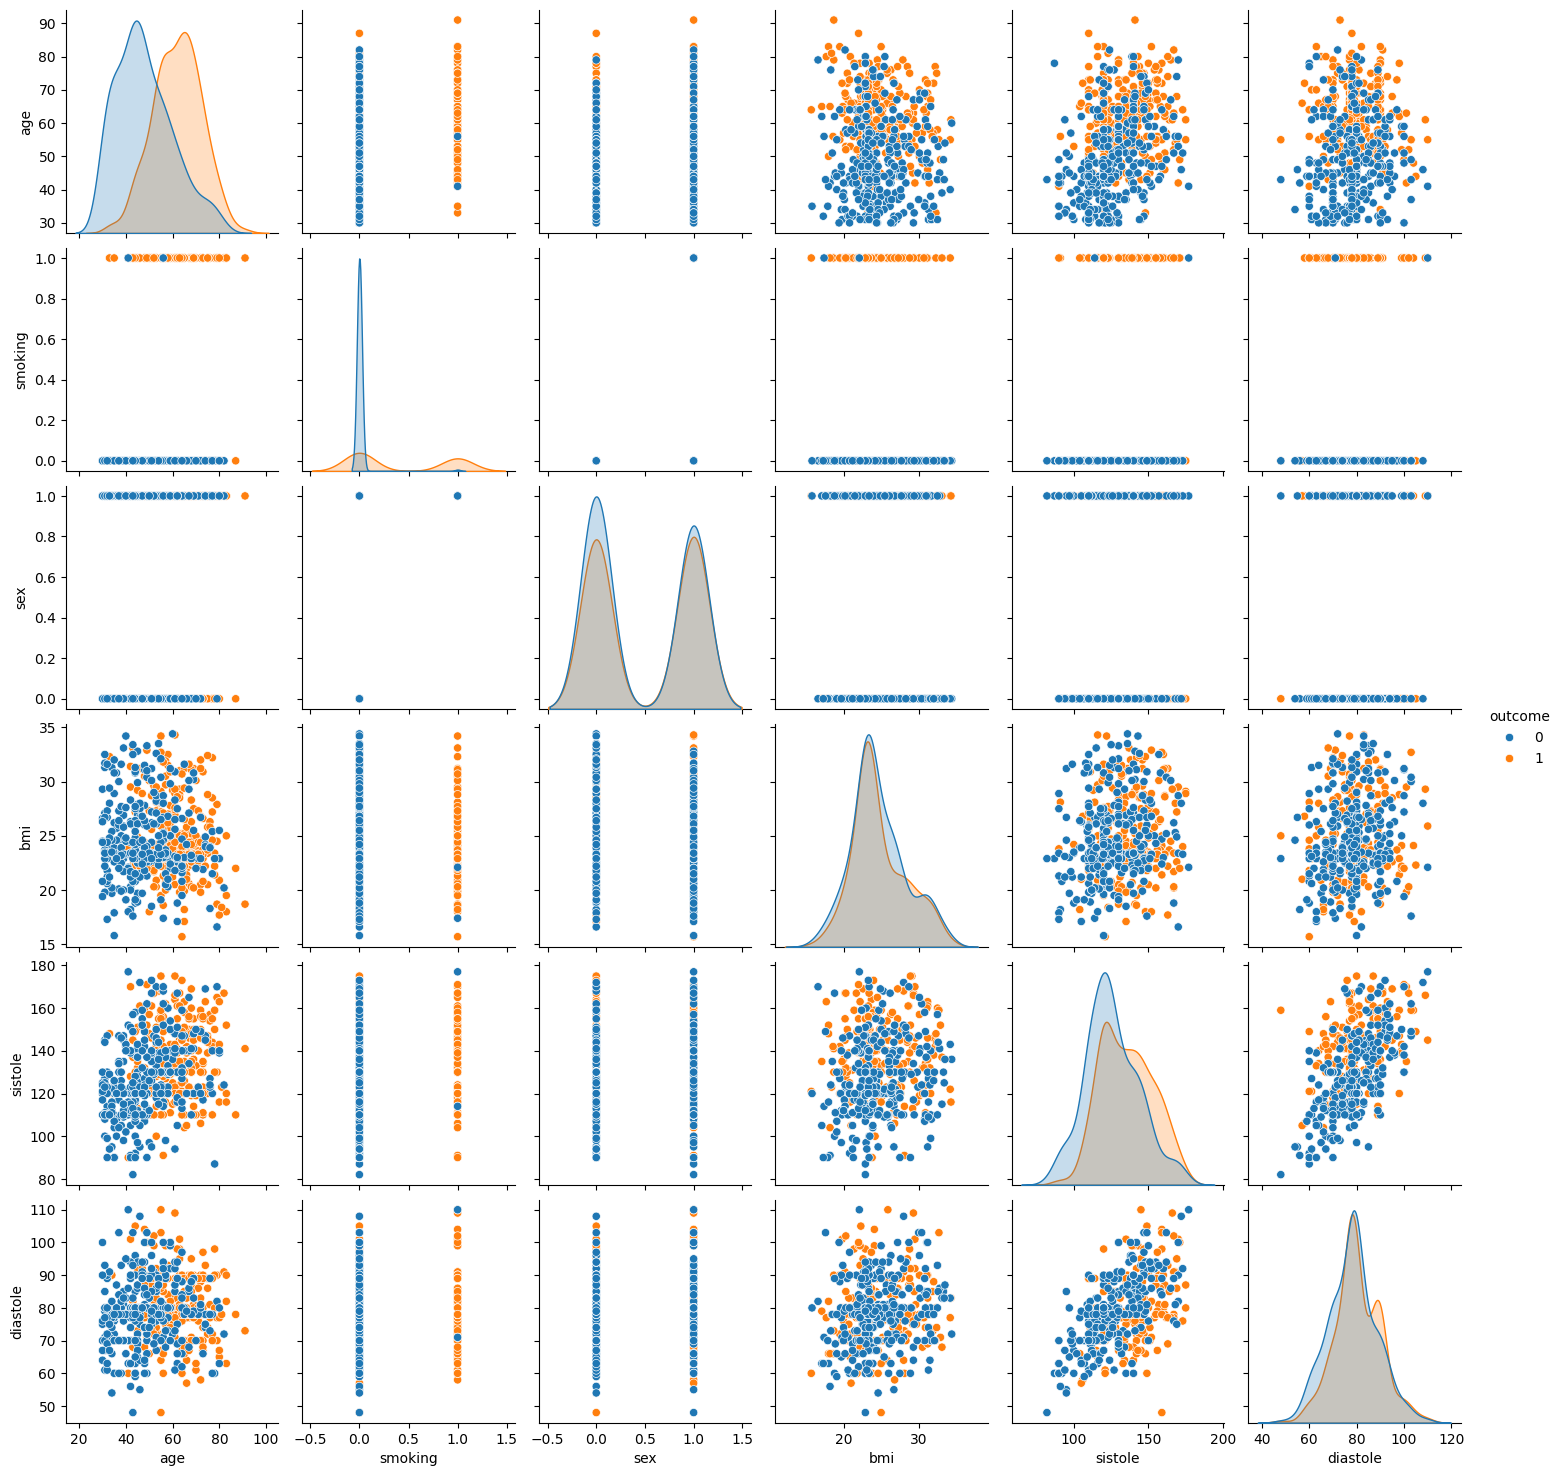

In [ ]:


sns.pairplot(df_sampel, hue='outcome')

<Axes: >

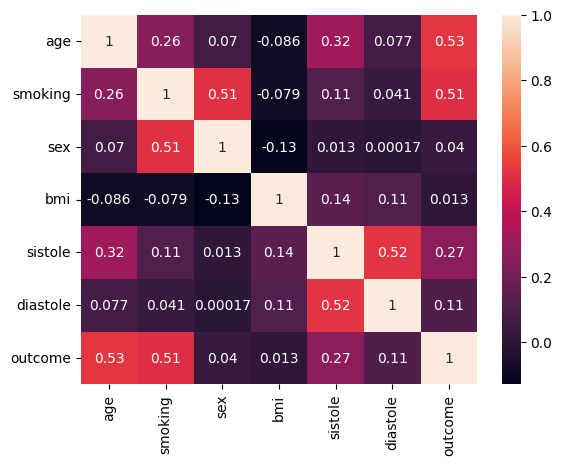

In [ ]:
corr_ = df_sampel.corr()
sns.heatmap(corr_, annot=True)

In [ ]:

# Separate features and target
X = df_sampel.drop(['outcome', 'diastole', 'bmi'], axis=1)
y = df_sampel['outcome']

In [ ]:
display(X)
display(y)

,age,smoking,sex,sistole
86,-0.637882,1,1,1.617411
168,-0.864051,1,1,0.801255
493,0.040625,1,1,0.638024
518,0.945302,0,0,1.073307
770,0.643743,1,1,1.998284
...,...,...,...,...
2787,-0.864051,0,1,1.018897
3552,-0.260934,0,0,-0.014900
3784,-1.316389,0,0,-1.429570
238,-1.693338,0,0,-2.191316


,outcome
86,1
168,1
493,1
518,1
770,1
...,...
2787,0
3552,0
3784,0
238,0


In [ ]:
from sklearn.preprocessing import StandardScaler


column_to_scale = ['age' , 'bmi', 'sistole']
scaler = StandardScaler()
df_sampel[column_to_scale] = scaler.fit_transform(df_sampel[column_to_scale])
print(df_sampel)


            age  smoking  sex       bmi   sistole  diastole  outcome
86    -0.637882        1    1 -0.459598  1.617411  0.075253        1
168   -0.864051        1    1 -0.708237  0.801255  0.275223        1
493    0.040625        1    1 -1.426529  0.638024 -0.724624        1
518    0.945302        0    0 -0.321465  1.073307  1.075100        1
770    0.643743        1    1  1.280879  1.998284 -0.124716        1
...         ...      ...  ...       ...       ...       ...      ...
2787  -0.864051        0    1 -1.951435  1.018897  2.374901        0
3552  -0.260934        0    0 -0.487224 -0.014900 -0.024731        0
3784  -1.316389        0    0  0.479707 -1.429570 -0.924593        0
238   -1.693338        0    0 -2.034315 -2.191316 -1.624486        0
12491  0.719133        0    0 -0.680611 -0.776646  0.375207        0

[566 rows x 7 columns]


In [ ]:

#pembagian data training dan testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

display(X_train.shape)
display(X_test.shape)

(452, 4)

(114, 4)

In [ ]:
params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

In [ ]:
# Model SCV setelah  proses Feature Selection
model_svc = SVC()

grid = GridSearchCV(model_svc, params, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']})

In [ ]:
print(f"Best Score: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

Best Score: 0.8293236714975846
Best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:

model_svc = SVC(**grid.best_params_)
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)

In [ ]:
y_pred_svc= model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Nilai akurasi model (SVC) adalah: {accuracy}")
print(classification_report(y_test, y_pred_svc))

Nilai akurasi model (SVC) adalah: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        64
           1       0.80      0.86      0.83        50

    accuracy                           0.84       114
   macro avg       0.84      0.84      0.84       114
weighted avg       0.85      0.84      0.84       114



In [ ]:
metrix = confusion_matrix(y_test, y_pred_svc)
metrix

array([[53, 11],
       [ 7, 43]])

In [ ]:
## Membangun dan mengevaluasi model (setelah FSE untuk perhitungan probabilitas)
# 1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Nilai akurasi model (Logistic Regression) adalah: {accuracy}")
print(classification_report(y_test, y_pred_logreg))

Nilai akurasi model (Logistic Regression) adalah: 0.868421052631579
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        64
           1       0.86      0.84      0.85        50

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [ ]:
metrix = confusion_matrix(y_test, y_pred_logreg)
metrix

array([[57,  7],
       [ 8, 42]])

In [ ]:
## Menghitung Probabilitas (setelah proses Feature Selection (FSE) dan Hyperparameter Tuning (Grid Search))

probability = logreg.predict_proba(X_test)[:, 1][0]
percentage_risk = round(probability * 100, 2)
print(X_test.iloc[1, :])
print(f"Persentase risiko terkena penyakit jantung adalah : {percentage_risk}% ")

age       -0.864051
smoking    0.000000
sex        0.000000
sistole   -0.939877
Name: 11903, dtype: float64
Persentase risiko terkena penyakit jantung adalah : 27.11% 


In [ ]:
rfe = RFE(logreg)
rfe_value = rfe.fit(X_train, y_train)

print(rfe_value.support_)
print(rfe_value.ranking_)


[False  True  True False False]
[2 1 1 4 3]


In [ ]:
metrix = confusion_matrix(y_test, y_pred_logreg)
metrix

array([[55,  9],
       [ 7, 43]])

In [ ]:
# 2. Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Akurasi model (Decision Tree)
y_pred_dtree = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dtree)

print(f"Nilai akurasi model (Decision Tree) adalah: {accuracy}")
print(classification_report(y_test, y_pred_dtree))


Nilai akurasi model (Decision Tree) adalah: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.89      0.77      0.82        64
           1       0.75      0.88      0.81        50

    accuracy                           0.82       114
   macro avg       0.82      0.82      0.82       114
weighted avg       0.83      0.82      0.82       114



In [ ]:
metrix = confusion_matrix(y_test, y_pred_dtree)
metrix

array([[49, 15],
       [ 6, 44]])

In [ ]:
# 3. Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Akurasi model (Random Forest)
y_pred_rforest = rforest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rforest)
print(f"Nilai akurasi model (Random Forest adalah: {accuracy}")
print(classification_report(y_test, y_pred_rforest))

Nilai akurasi model (Random Forest adalah: 0.8070175438596491
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        64
           1       0.75      0.84      0.79        50

    accuracy                           0.81       114
   macro avg       0.81      0.81      0.81       114
weighted avg       0.81      0.81      0.81       114



In [ ]:
metrix = confusion_matrix(y_test, y_pred_rforest)
metrix

array([[50, 14],
       [ 8, 42]])